In [ ]:
!git clone https://github.com/pvijay03/CSE151A-Project.git

Cloning into 'CSE151A-Project'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 77 (delta 38), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (77/77), 6.51 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
#Milestone 1
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Milestone 1
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
# Import dataset from Github

rawDataFrame = pd.read_csv('/content/CSE151A-Project/new_york_listings_2024.csv')

In [ ]:
print("Total Number of Observations (before filtering)")
print(rawDataFrame.size)

Total Number of Observations (before filtering)
456676


In [ ]:
print("Size of Dataset (rows by columns)")
print(rawDataFrame.shape)

# 22 different features

Size of Dataset (rows by columns)
(20758, 22)


In [ ]:
print("Summary Statistics for Numerical Features in Dataset:")
print(rawDataFrame.describe())

Summary Statistics for Numerical Features in Dataset:
                 id       host_id      latitude     longitude          price  \
count  2.075800e+04  2.075800e+04  20758.000000  20758.000000   20758.000000   
mean   3.034044e+17  1.749316e+08     40.726798    -73.939161     187.776616   
std    3.901216e+17  1.725541e+08      0.060294      0.061403    1022.797208   
min    2.595000e+03  1.678000e+03     40.500314    -74.249840      10.000000   
25%    2.708808e+07  2.041738e+07     40.684150    -73.980710      80.000000   
50%    4.993003e+07  1.087271e+08     40.722820    -73.949587     125.000000   
75%    7.216019e+17  3.144102e+08     40.763098    -73.917460     199.000000   
max    1.054376e+18  5.504035e+08     40.911147    -73.713650  100000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20758.000000       20758.000000       20758.000000   
mean        28.558435          42.642596           1.257910   
std         33.536518          73.56

In [ ]:
print("Frequency Counts for Unique Categorical Feature Values:")
for c in rawDataFrame.select_dtypes(include=["object"]).columns:
  print(c + ":")
  print(rawDataFrame[c].value_counts())
  print()

Frequency Counts for Unique Categorical Feature Values:
name:
Rental unit in New York · 1 bedroom · 1 bed · 1 bath                    409
Rental unit in New York · ★5.0 · 1 bedroom · 1 bed · 1 bath             235
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 bath                    201
Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1 bed · 1 bath             173
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 shared bath             158
                                                                       ... 
Rental unit in Brooklyn · ★4.52 · 1 bedroom · 3 beds · 1 bath             1
Rental unit in Brooklyn · ★4.83 · 2 bedrooms · 1 bed · 1 shared bath      1
Townhouse in Queens · ★4.33 · 2 bedrooms · 3 beds · 1 bath                1
Rental unit in New York · ★4.50 · 1 bedroom · 1 bed · 1 private bath      1
Rental unit in New York · ★4.46 · 1 bedroom · 2 beds · 1 bath             1
Name: name, Length: 9836, dtype: int64

host_name:
Jeniffer           184
Urban Furnished    176
Micha

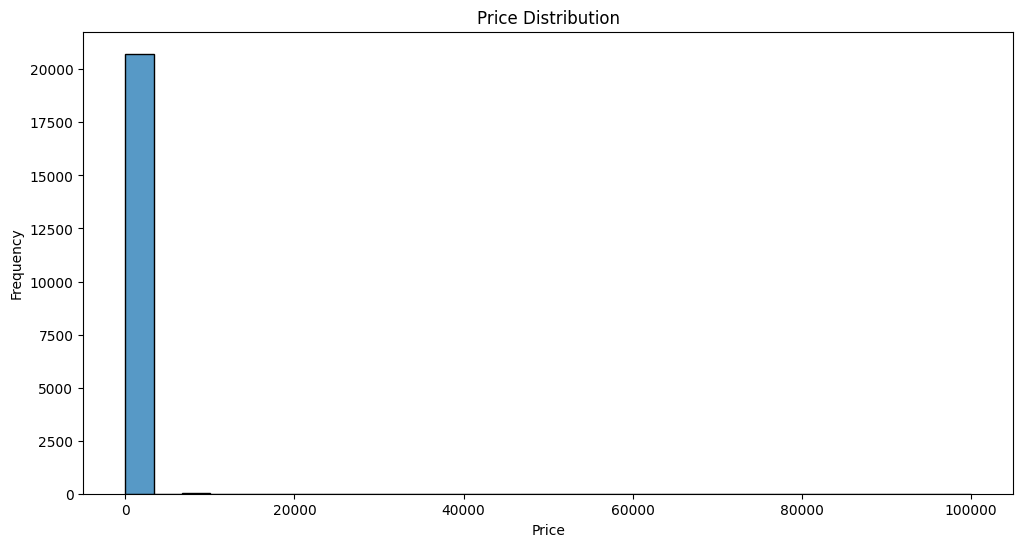

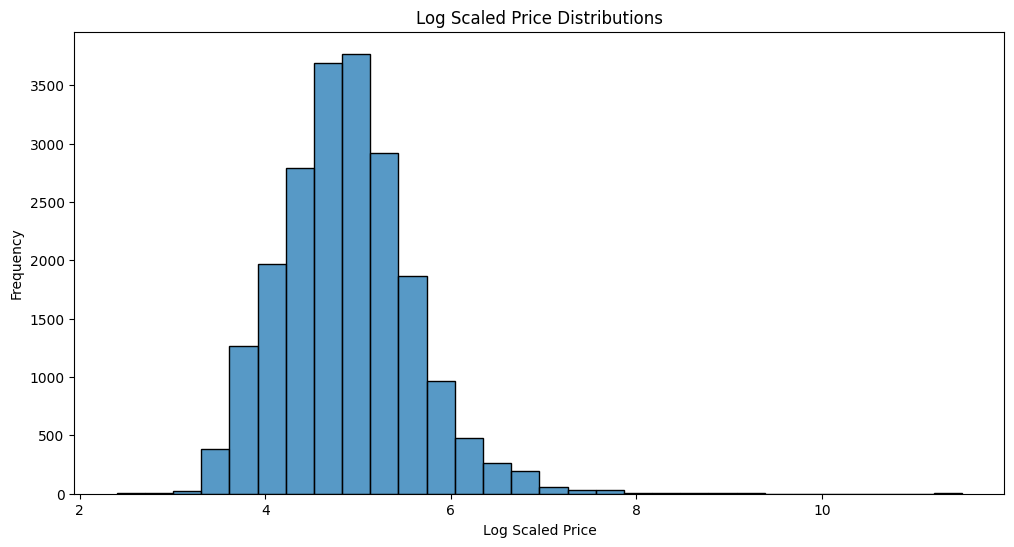

In [ ]:
# Price Distribution of Houses, as well as a log transformed version
# This provided a better spread of the data

plt.figure(figsize=(12,6))
sns.histplot(rawDataFrame['price'], bins=30)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(12,6))
rawDataFrame['log_price'] = np.log1p(rawDataFrame['price'])
sns.histplot(rawDataFrame['log_price'], bins=30)
plt.title("Log Scaled Price Distributions")
plt.xlabel("Log Scaled Price")
plt.ylabel("Frequency")
plt.show()


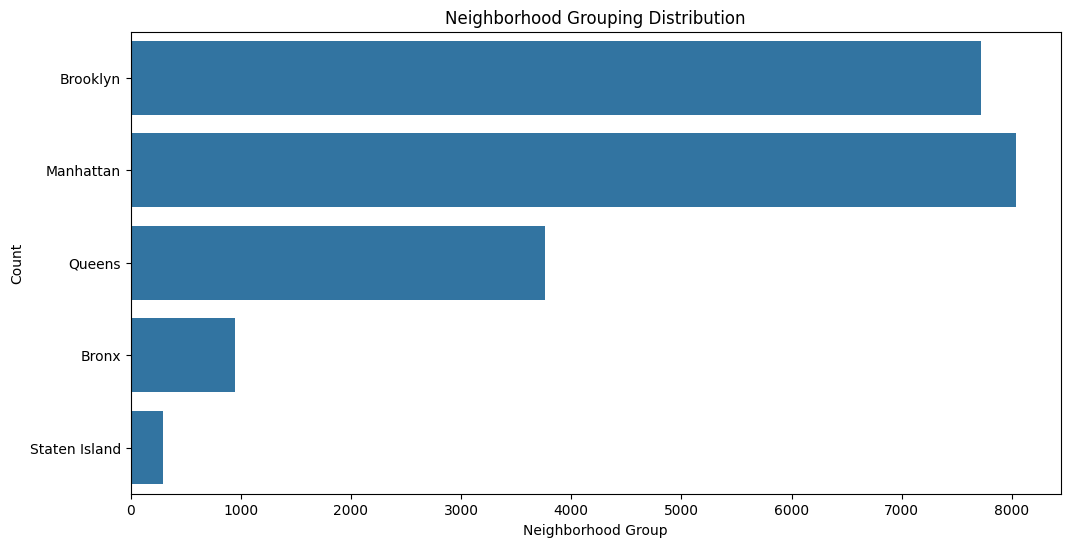

In [ ]:
# To start understanding geographical distribution, we plot the
# neighborhood grouping within New York boroughs

plt.figure(figsize=(12,6))
sns.countplot(rawDataFrame["neighbourhood_group"])
plt.title("Neighborhood Grouping Distribution")
plt.ylabel("Count")
plt.xlabel("Neighborhood Group")
plt.show()

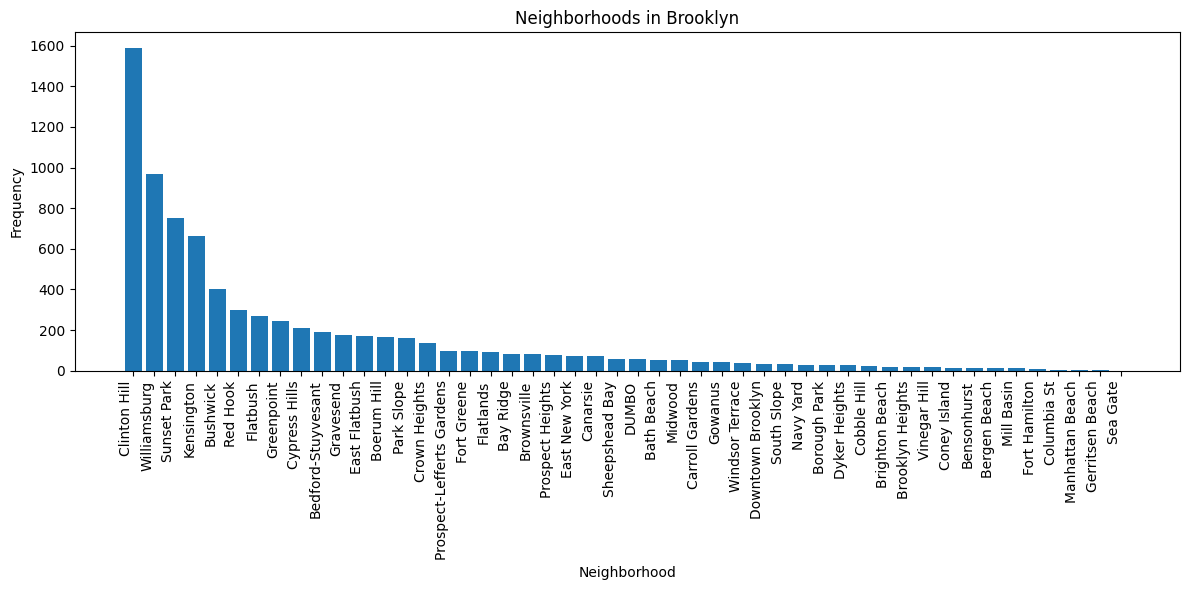

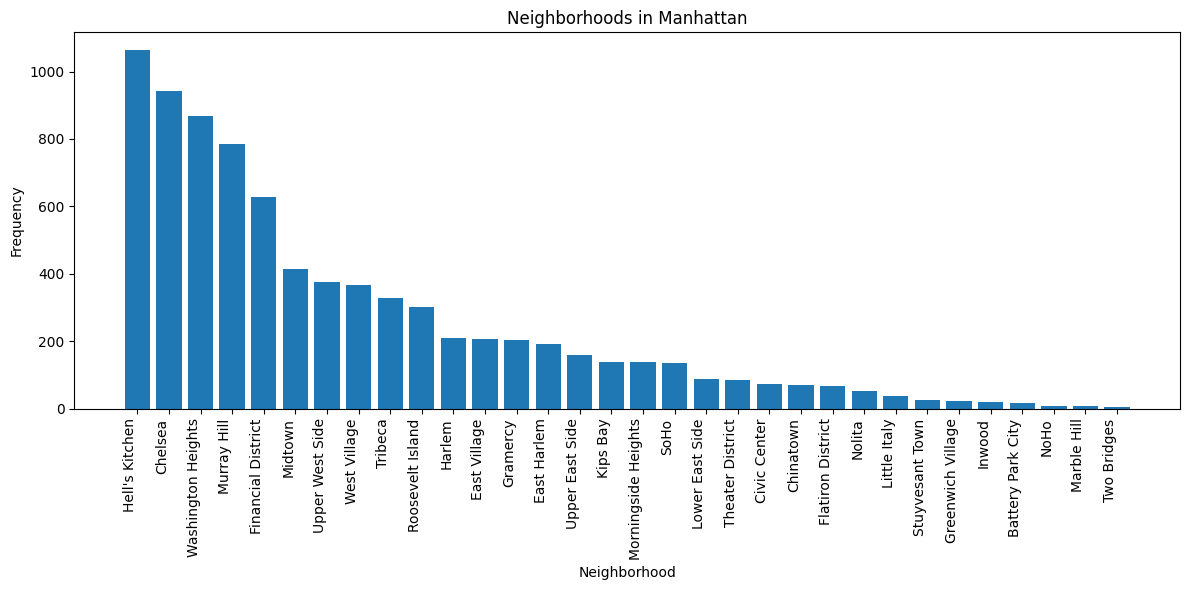

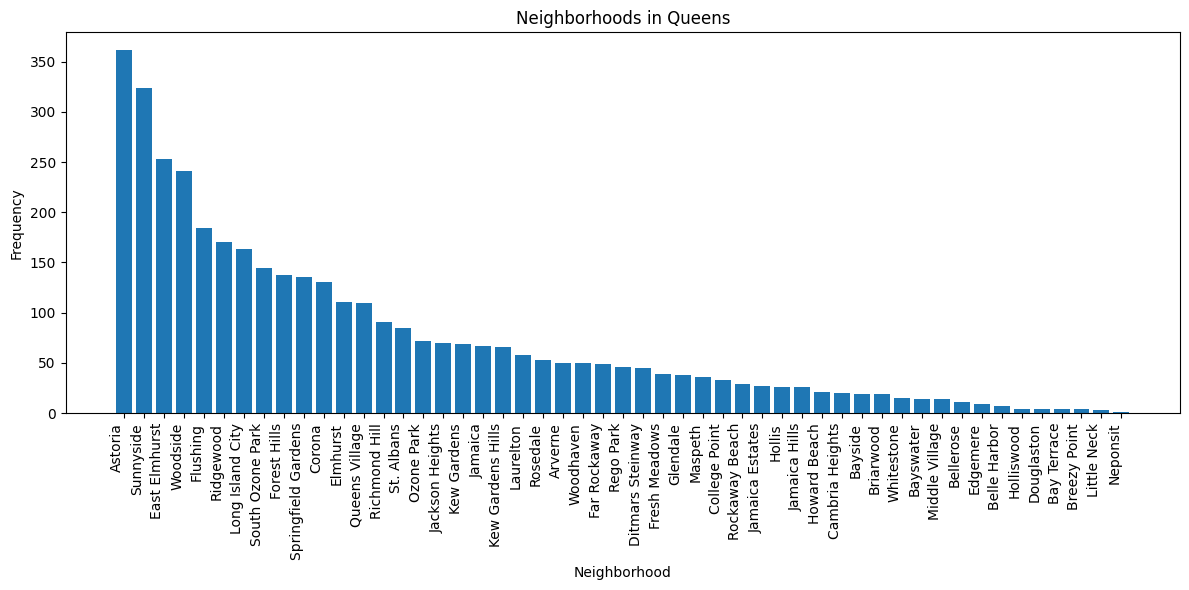

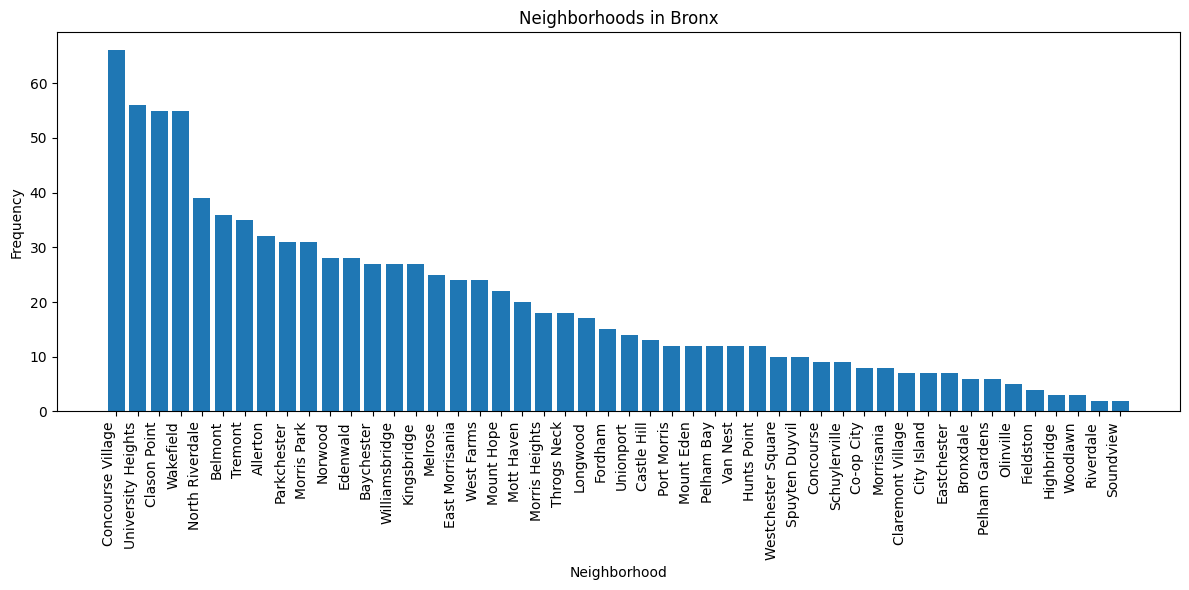

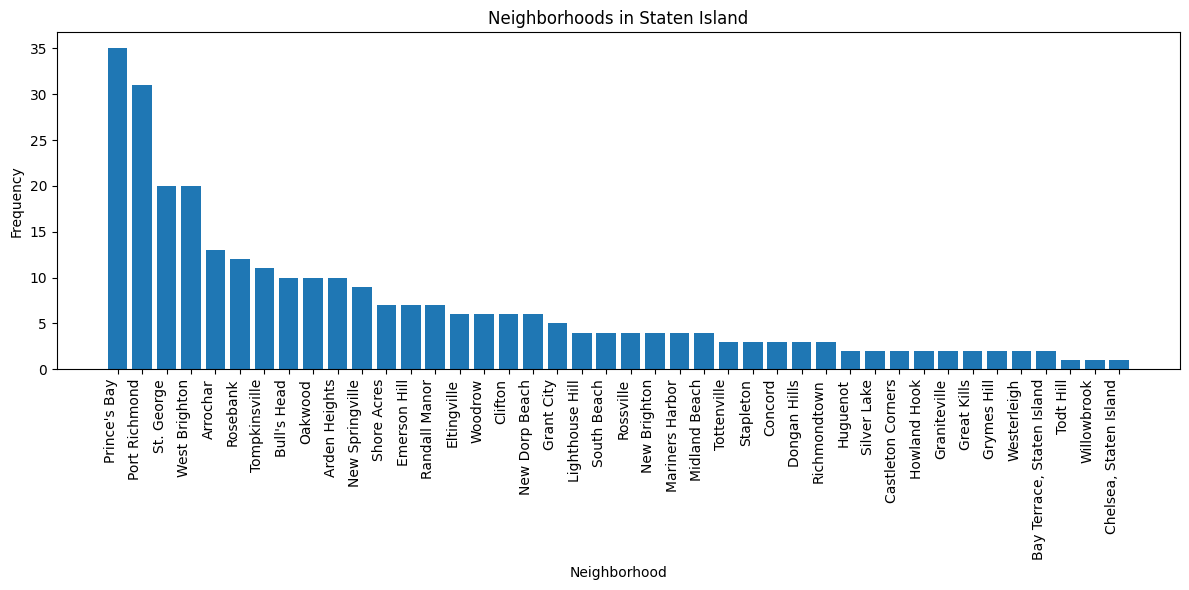

In [ ]:
# We further plotted the distributions within each borough, to find the most populous areas

unique_neighborhood_groups = rawDataFrame['neighbourhood_group'].unique()

for neighborhood_group in unique_neighborhood_groups:
    plt.figure(figsize=(12, 6))
    neighborhood_data = rawDataFrame[rawDataFrame['neighbourhood_group'] == neighborhood_group]
    unique_neighborhoods = neighborhood_data['neighbourhood'].unique()
    x_ticks = range(len(unique_neighborhoods))
    plt.bar(x_ticks, neighborhood_data['neighbourhood'].value_counts(), width=0.8)
    plt.title(f'Neighborhoods in {neighborhood_group}')
    plt.xlabel('Neighborhood')
    plt.ylabel('Frequency')
    plt.xticks(x_ticks, unique_neighborhoods, rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
#No directly null items but some items state that feature is "Not specified"

not_specified_counts = {}
for column in rawDataFrame.columns:
    not_specified_counts[column] = (rawDataFrame[column] == "Not specified").sum()

# Print the counts for these erroneous features

for column, count in not_specified_counts.items():
    print(f"Column '{column}': {count} rows with 'Not specified' rawDataFrame")

Column 'id': 0 rows with 'Not specified' rawDataFrame
Column 'name': 0 rows with 'Not specified' rawDataFrame
Column 'host_id': 0 rows with 'Not specified' rawDataFrame
Column 'host_name': 0 rows with 'Not specified' rawDataFrame
Column 'neighbourhood_group': 0 rows with 'Not specified' rawDataFrame
Column 'neighbourhood': 0 rows with 'Not specified' rawDataFrame
Column 'latitude': 0 rows with 'Not specified' rawDataFrame
Column 'longitude': 0 rows with 'Not specified' rawDataFrame
Column 'room_type': 0 rows with 'Not specified' rawDataFrame
Column 'price': 0 rows with 'Not specified' rawDataFrame
Column 'minimum_nights': 0 rows with 'Not specified' rawDataFrame
Column 'number_of_reviews': 0 rows with 'Not specified' rawDataFrame
Column 'last_review': 0 rows with 'Not specified' rawDataFrame
Column 'reviews_per_month': 0 rows with 'Not specified' rawDataFrame
Column 'calculated_host_listings_count': 0 rows with 'Not specified' rawDataFrame
Column 'availability_365': 0 rows with 'Not sp

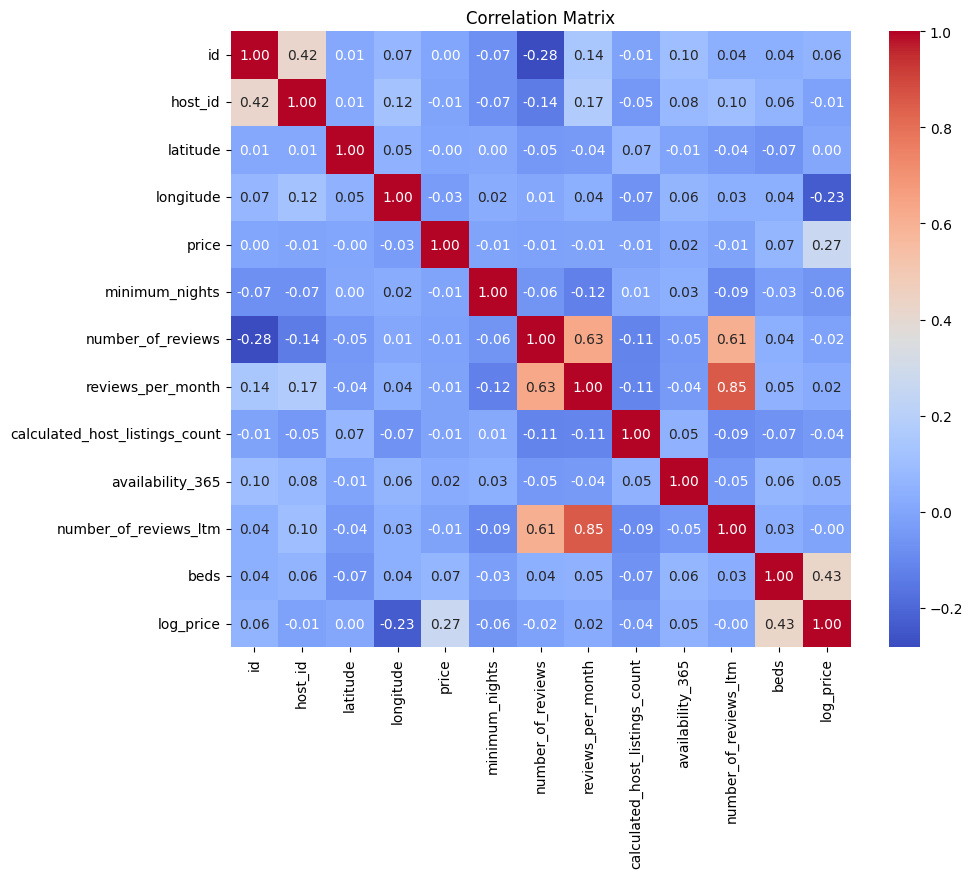

In [ ]:
numerical_data = rawDataFrame.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

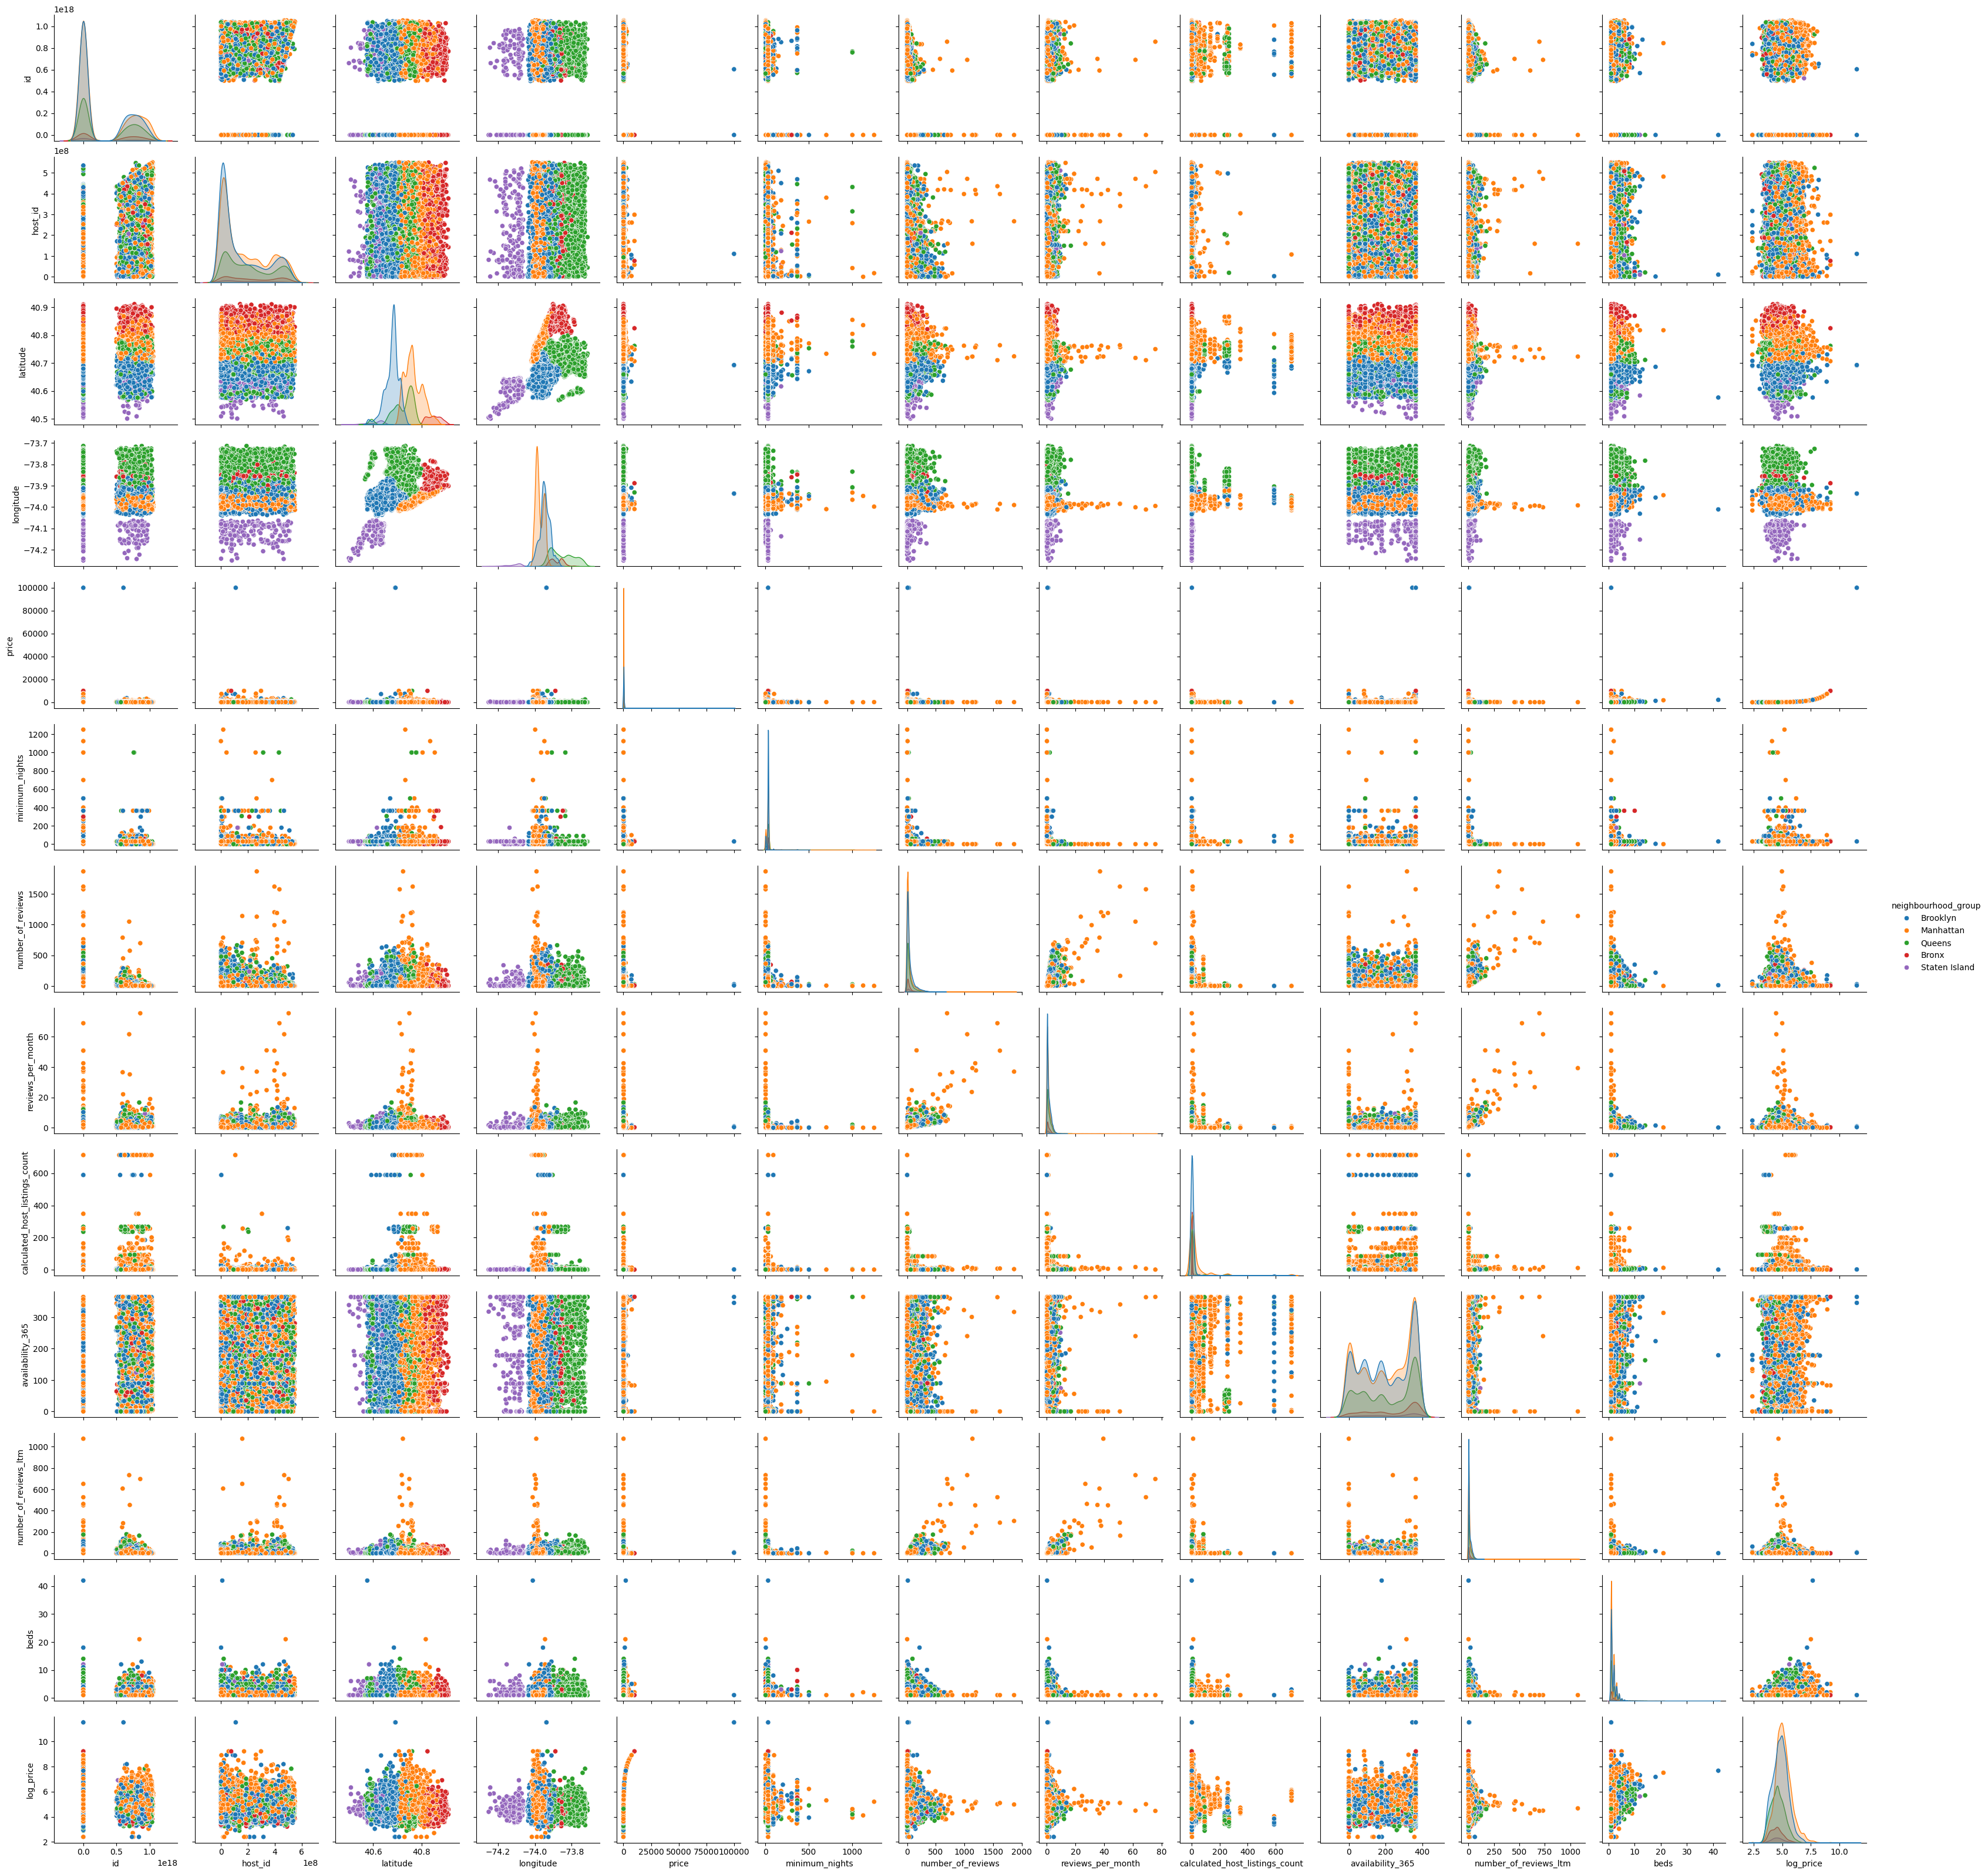

In [ ]:
sns.pairplot(rawDataFrame, hue='neighbourhood_group')
plt.show()
#Based on color separation it seems doable to develop a classification based model

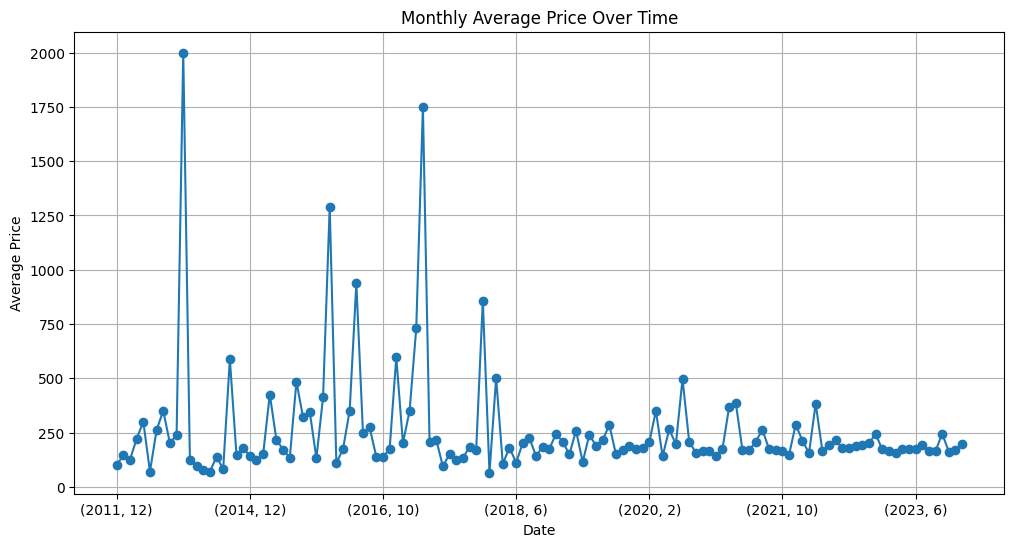

In [ ]:
rawDataFrame['last_review'] = pd.to_datetime(rawDataFrame['last_review'])


rawDataFrame['year'] = rawDataFrame['last_review'].dt.year
rawDataFrame['month'] = rawDataFrame['last_review'].dt.month


monthly_avg_price = rawDataFrame.groupby(['year', 'month'])['price'].mean()
plt.figure(figsize=(12, 6))
monthly_avg_price.plot(marker='o')
plt.title('Monthly Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
# Milestone 2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

cleanedDataFrame = rawDataFrame[rawDataFrame['rating'] != 'No rating']
cleanedDataFrame = cleanedDataFrame[cleanedDataFrame['rating'] != 'New ']

# Replace Studio in bedrooms column with 1
cleanedDataFrame['bedrooms'] = cleanedDataFrame['bedrooms'].replace('Studio', 1)

# Replace Not specified in baths column with 0
cleanedDataFrame['baths'] = cleanedDataFrame['baths'].replace('Not specified', 0)

# Separate target variable and features
X = cleanedDataFrame.drop(columns=['price'])
y = cleanedDataFrame['price']


# Set numerical and categorical features
numerical_cols = ['rating', 'bedrooms', 'beds', 'baths']

categorical_cols = ['neighbourhood_group', 'room_type']

<ipython-input-15-16ad115db347>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedDataFrame['bedrooms'] = cleanedDataFrame['bedrooms'].replace('Studio', 1)
<ipython-input-15-16ad115db347>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedDataFrame['baths'] = cleanedDataFrame['baths'].replace('Not specified', 0)


In [ ]:

# Define the transformation pipelines

# Simple Imputer, Polynomial Feature Expansion, and Standard Scaler
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# Simple Imputer and One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Apply the pipelines to the preprocessor and transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_transformed = preprocessor.fit_transform(X)

# Get new renamed column names after transformation
transformed_column_names = (
    list(preprocessor.named_transformers_['num']['poly'].get_feature_names_out(numerical_cols)) +
    list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
)

# Create dataframe from X_transformed and new column names
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_column_names)
X_transformed_df

rating  bedrooms      beds     baths  rating^2  rating bedrooms  \
0      0.902740 -0.503904 -0.607083 -2.462163  0.971042        -0.428553   
1     -0.218268  0.774537 -0.607083 -0.356319 -0.268342         0.728743   
2     -1.916763 -0.503904  0.202901 -0.356319 -1.985016        -0.649880   
3     -0.320177 -0.503904 -0.607083 -0.356319 -0.376818        -0.524550   
4      0.597010 -0.503904 -0.607083 -0.356319  0.624639        -0.452553   
...         ...       ...       ...       ...       ...              ...   
17001  0.053492 -0.503904 -0.607083 -0.356319  0.024347        -0.495218   
17002 -0.931636 -0.503904  0.202901 -0.356319 -1.012998        -0.572549   
17003  0.664950 -0.503904 -0.607083 -0.356319  0.701074        -0.447219   
17004  0.902740 -0.503904 -0.607083 -0.356319  0.971042        -0.428553   
17005  0.529071 -0.503904 -0.607083 -0.356319  0.548515        -0.457886   

       rating beds  rating baths  bedrooms^2  bedrooms beds  bedrooms baths  \
0        -0.558662     -2.418178   -0.363413      -0.317793       -0.674453   
1        -0.614753     -0.378909    0.337476      -0.170579        0.071038   
2         0.009043     -0.597246   -0.363413      -0.170579       -0.301708   
3        -0.619852     -0.392009   -0.363413      -0.317793       -0.301708   
4        -0.573960     -0.274107   -0.363413      -0.317793       -0.301708   
...            ...           ...         ...            ...             ...   
17001    -0.601155     -0.343975   -0.363413      -0.317793       -0.301708   
17002     0.107626     -0.470610   -0.363413      -0.170579       -0.301708   
17003    -0.570560     -0.265373   -0.363413      -0.317793       -0.301708   
17004    -0.558662     -0.234806   -0.363413      -0.317793       -0.301708   
17005    -0.577359     -0.282840   -0.363413      -0.317793       -0.301708   

         beds^2  beds baths   baths^2  neighbourhood_group_Bronx  \
0     -0.222886   -0.396856 -0.569724                        0.0   
1     -0.222886   -0.223428 -0.211979                        0.0   
2     -0.036369   -0.050001 -0.211979                        0.0   
3     -0.222886   -0.223428 -0.211979                        0.0   
4     -0.222886   -0.223428 -0.211979                        0.0   
...         ...         ...       ...                        ...   
17001 -0.222886   -0.223428 -0.211979                        0.0   
17002 -0.036369   -0.050001 -0.211979                        0.0   
17003 -0.222886   -0.223428 -0.211979                        0.0   
17004 -0.222886   -0.223428 -0.211979                        0.0   
17005 -0.222886   -0.223428 -0.211979                        0.0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                               1.0                            0.0   
1                               0.0                            1.0   
2                               0.0                            1.0   
3                               0.0                            1.0   
4                               0.0                            1.0   
...                             ...                            ...   
17001                           0.0                            1.0   
17002                           0.0                            1.0   
17003                           0.0                            1.0   
17004                           0.0                            1.0   
17005                           0.0                            0.0   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   
...                           ...                        

In [ ]:
# Milestone 3
# count = 0
# bin = 0
# starting = -1
# ending = 0
# y_np = y.to_numpy()
# y_np.sort()
# for i in y:
#   if starting == -1:
#     starting = i
#   count += 1
#   ending = i
#   if count == 1700:
#     print("if price >= ", starting, " and price < ", ending, ":")
#     print("\t return ", bin)
#     starting = -1
#     bin += 1
#     count = 0

def getBin(price):
  # if price <  55.0 :
	#   return  0
  if price <  74.0 :
    return  1
  # if price <  90.0 :
  #   return  2
  if price <  105.0 :
    return  3
  # if price <  125.0 :
  #   return  4
  if price <  150.0 :
    return  5
  # if price <  175.0 :
  #   return  6
  if price <  217.0 :
    return  7
  # if price <  300.0 :
  #   return  8
  return  9


In [ ]:
print(max(y))
print(min(y))
new_y = y.apply(getBin)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, new_y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

100000.0
10.0


(13604, 23)

(13604,)

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='tanh', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


339/341 [============================>.] - ETA: 0s - loss: 13.0309 - accuracy: 0.1981

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


341/341 [==============================] - 10s 19ms/step - loss: 13.0303 - accuracy: 0.1983 - val_loss: 12.8456 - val_accuracy: 0.1974
Epoch 2/10
341/341 [==============================] - 7s 21ms/step - loss: 13.2924 - accuracy: 0.1983 - val_loss: 14.0895 - val_accuracy: 0.1974
Epoch 3/10
341/341 [==============================] - 6s 18ms/step - loss: 15.0154 - accuracy: 0.1983 - val_loss: 16.2195 - val_accuracy: 0.1974
Epoch 4/10
341/341 [==============================] - 8s 25ms/step - loss: 17.6358 - accuracy: 0.1983 - val_loss: 19.0910 - val_accuracy: 0.1974
Epoch 5/10
341/341 [==============================] - 6s 17ms/step - loss: 20.6675 - accuracy: 0.1983 - val_loss: 22.1495 - val_accuracy: 0.1974
Epoch 6/10
341/341 [==============================] - 7s 21ms/step - loss: 23.7251 - accuracy: 0.1983 - val_loss: 25.3254 - val_accuracy: 0.1974
Epoch 7/10
341/341 [==============================] - 6s 18ms/step - loss: 27.1052 - accuracy: 0.1983 - val_loss: 28.7717 - val_accuracy: 0.

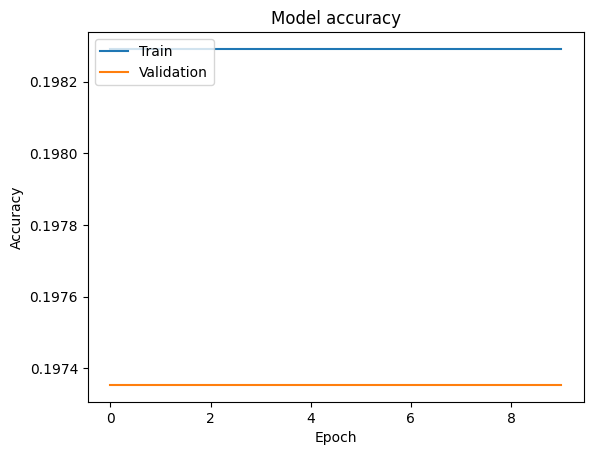

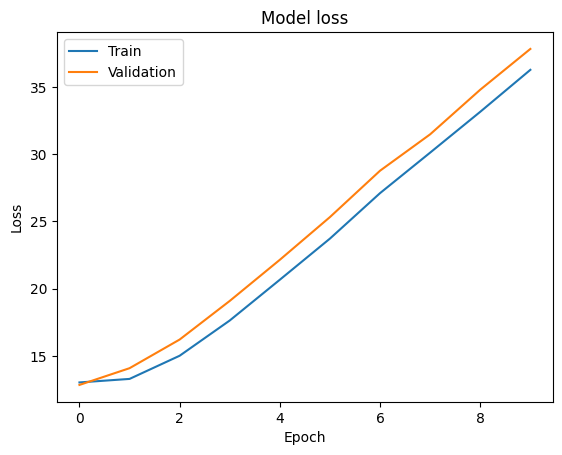

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 657.1 kB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
# Milestone 4
from keras.callbacks import History
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

one_hot_encoded_train = pd.get_dummies(y_train)

one_hot_encoded_test = pd.get_dummies(y_test)

print("ONE HOT ENCODED TEST")
print(one_hot_encoded_test)

ONE HOT ENCODED TEST
       1  3  5  7  9
7417   1  0  0  0  0
4253   0  0  0  1  0
12741  0  0  0  1  0
14213  0  0  0  1  0
6554   1  0  0  0  0
...   .. .. .. .. ..
3471   0  0  0  1  0
15923  1  0  0  0  0
6795   0  0  0  1  0
4393   0  0  0  1  0
8163   1  0  0  0  0

[3402 rows x 5 columns]


In [ ]:


def build_model(hp):
  model = Sequential([
      Dense(units=hp.Int('units_1', min_value=0, max_value=1024, step=1), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid']), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_2', min_value=0, max_value=512, step=1), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_3', min_value=0, max_value=256, step=1), activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=hp.Int('units_4', min_value=0, max_value=64, step=1), activation=hp.Choice('activation_4', values=['relu', 'tanh', 'sigmoid'])),
      BatchNormalization(),
      Dropout(rate=hp.Float('dropout_4', min_value=0.2, max_value=0.8, step=0.1)),
      Dense(units=one_hot_encoded_train.shape[1], activation=hp.Choice('activation_5', values=['softmax', 'relu', 'tanh', 'sigmoid']))
  ])
  # Choice of loss function and learning rate
  loss_function = hp.Choice('loss', values=['mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'])
  learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

  # Compile the model
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=loss_function,
                metrics=['accuracy'])
  return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="hw2",
    project_name="hyperparamter_tuning_results"
)

# Search
tuner.search(X_train, one_hot_encoded_train, epochs=50, validation_data=(X_test, one_hot_encoded_test), verbose=0)

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Print the set of optimal hyperparameters
print("Optimal Hyperparameters:")
print(best_hyperparameters.values)

# Initialize model
best_model = Sequential([
      Dense(units=best_hyperparameters.get('units_1'), activation=best_hyperparameters.get('activation_1'), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_1')),
      Dense(units=best_hyperparameters.get('units_2'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_3')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_3')),
      Dense(units=best_hyperparameters.get('units_4'), activation=best_hyperparameters.get('activation_4')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_4')),
      Dense(units=one_hot_encoded_train.shape[1], activation=best_hyperparameters.get('activation_5'))
    ])

# Compile and train model
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparameters.get('lr')),
                  loss=best_hyperparameters.get('loss'),
                  metrics=['accuracy'])
history = best_model.fit(X_train, one_hot_encoded_train, epochs=50, validation_data=(X_test, one_hot_encoded_test), verbose=0)

# Calculate loss and accuracy
loss, accuracy = best_model.evaluate(X_test, one_hot_encoded_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

ONE HOT ENCODED TEST
       1  3  5  7  9
7417   1  0  0  0  0
4253   0  0  0  1  0
12741  0  0  0  1  0
14213  0  0  0  1  0
6554   1  0  0  0  0
...   .. .. .. .. ..
3471   0  0  0  1  0
15923  1  0  0  0  0
6795   0  0  0  1  0
4393   0  0  0  1  0
8163   1  0  0  0  0

[3402 rows x 5 columns]
Optimal Hyperparameters:
{'units_1': 634, 'activation_1': 'sigmoid', 'dropout_1': 0.30000000000000004, 'units_2': 336, 'activation_2': 'sigmoid', 'dropout_2': 0.30000000000000004, 'units_3': 72, 'activation_3': 'relu', 'dropout_3': 0.4, 'units_4': 10, 'activation_4': 'sigmoid', 'dropout_4': 0.6000000000000001, 'activation_5': 'softmax', 'loss': 'binary_crossentropy', 'lr': 0.0029189145650628753}
107/107 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.4089
Test Loss: 0.42874327301979065
Test Accuracy: 0.4088771343231201


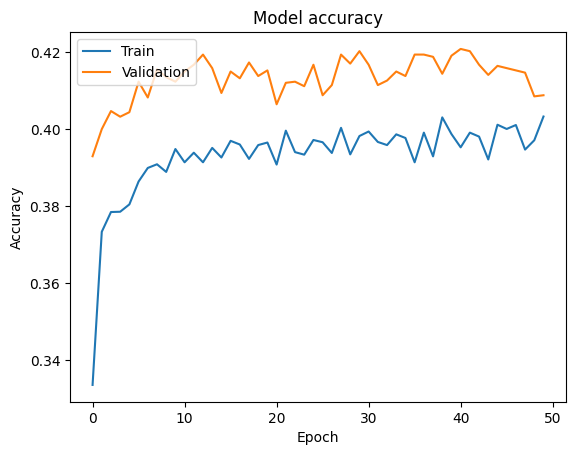

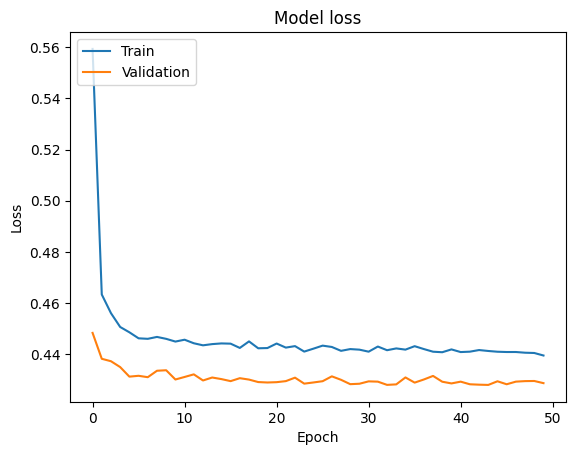

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
X = np.concatenate((X_train, X_test), axis=0)
Y_one_hot = np.concatenate((one_hot_encoded_train, one_hot_encoded_test), axis=0)

X_augmented = np.repeat(X, 2, axis=0)
Y_one_hot_augmented = np.repeat(Y_one_hot, 2, axis=0)

split_index = len(X_train)*2

x_train_augmented = X_augmented[:split_index]
x_test_augmented = X_augmented[split_index:]
y_train_one_hot_augmented = Y_one_hot_augmented[:split_index]
y_test_one_hot_augmented = Y_one_hot_augmented[split_index:]

# Model 3
# While this model was significantly more accurate than our first iteration, it still leaves a lot to be desired.
# For our third version we are going to implement a group of changes in an attempt to increase the accuracy of our model.
# First, we are going to try ensemble learnings, where we utilize the predictions of multiple models to create a system
# that is greater than the sum of its parts. We will create three different models, each one will be trained on a different
# part of the dataset, so it will be the "expert" of that part. By combining the predictions of these three models we can
# get a potentially more accurate prediction. We can also use a method of validation such as K-fold cross validation to
# utilize every datapoint for testing and training. This will allow us to maximize the amount of data our model is introduced to.
# We believe that by combining some or all of these methods we will be able to effectively increase our model's accuracy.



In [ ]:
# Retrieve the best hyperparameters
# best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_hyperparameters = {'units_1': 722, 'activation_1': 'tanh', 'dropout_1': 0.30000000000000004, 'units_2': 173, 'activation_2': 'tanh', 'dropout_2': 0.2, 'units_3': 86, 'activation_3': 'sigmoid', 'dropout_3': 0.6000000000000001, 'units_4': 24, 'activation_4': 'sigmoid', 'dropout_4': 0.2, 'activation_5': 'tanh', 'loss': 'mean_squared_error', 'lr': 0.0001316579206144295}
# Print the set of optimal hyperparameters
print("Optimal Hyperparameters:")
print(best_hyperparameters.values)


#

Optimal Hyperparameters:
<built-in method values of dict object at 0x7f6e21640580>


In [ ]:

# Initialize model
first_model = Sequential([
      Dense(units=best_hyperparameters.get('units_1'), activation=best_hyperparameters.get('activation_1'), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_1')),
      Dense(units=best_hyperparameters.get('units_2'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_3')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_3')),
      Dense(units=best_hyperparameters.get('units_4'), activation=best_hyperparameters.get('activation_4')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_4')),
      Dense(units=one_hot_encoded_train.shape[1], activation=best_hyperparameters.get('activation_5'))
    ])

# Compile and train model
first_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparameters.get('lr')),
                  loss=best_hyperparameters.get('loss'),
                  metrics=['accuracy'])
history = first_model.fit(x_train_augmented, y_train_one_hot_augmented, epochs=20, validation_data=(X_test, one_hot_encoded_test), verbose=1)

# Calculate loss and accuracy
loss, accuracy = first_model.evaluate(x_test_augmented, y_test_one_hot_augmented)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/20
851/851 [==============================] - 10s 9ms/step - loss: 0.5218 - accuracy: 0.2824 - val_loss: 0.2086 - val_accuracy: 0.3774
Epoch 2/20
851/851 [==============================] - 6s 7ms/step - loss: 0.3491 - accuracy: 0.2882 - val_loss: 0.1812 - val_accuracy: 0.3827
Epoch 3/20
851/851 [==============================] - 7s 9ms/step - loss: 0.2735 - accuracy: 0.2887 - val_loss: 0.1557 - val_accuracy: 0.3854
Epoch 4/20
851/851 [==============================] - 13s 15ms/step - loss: 0.2231 - accuracy: 0.3019 - val_loss: 0.1466 - val_accuracy: 0.3898
Epoch 5/20
851/851 [==============================] - 8s 10ms/step - loss: 0.1913 - accuracy: 0.3214 - val_loss: 0.1441 - val_accuracy: 0.3886
Epoch 6/20
851/851 [==============================] - 7s 8ms/step - loss: 0.1725 - accuracy: 0.3362 - val_loss: 0.1417 - val_accuracy: 0.3927
Epoch 7/20
851/851 [==============================] - 7s 9ms/step - loss: 0.1605 - accuracy: 0.3572 - val_loss: 0.1402 - val_accuracy: 0.3980
Ep

In [ ]:

# Initialize model
second_model = Sequential([
      Dense(units=best_hyperparameters.get('units_1'), activation=best_hyperparameters.get('activation_1'), input_shape=(X_train.shape[1],)),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_1')),
      Dense(units=best_hyperparameters.get('units_2'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=best_hyperparameters.get('units_3'), activation=best_hyperparameters.get('activation_3')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_4')),
      Dense(units=one_hot_encoded_train.shape[1], activation=best_hyperparameters.get('activation_5'))
    ])

# Compile and train model
second_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparameters.get('lr')),
                  loss=best_hyperparameters.get('loss'),
                  metrics=['accuracy'])
history = second_model.fit(x_train_augmented, y_train_one_hot_augmented, epochs=20, validation_data=(X_test, one_hot_encoded_test), verbose=1)

# Calculate loss and accuracy
loss, accuracy = second_model.evaluate(x_test_augmented, y_test_one_hot_augmented)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/7
851/851 [==============================] - 21s 14ms/step - loss: 0.4861 - accuracy: 0.2680 - val_loss: 0.2042 - val_accuracy: 0.3812
Epoch 2/7
851/851 [==============================] - 9s 10ms/step - loss: 0.3377 - accuracy: 0.2705 - val_loss: 0.1750 - val_accuracy: 0.3865
Epoch 3/7
851/851 [==============================] - 8s 9ms/step - loss: 0.2839 - accuracy: 0.2792 - val_loss: 0.1576 - val_accuracy: 0.3859
Epoch 4/7
851/851 [==============================] - 9s 10ms/step - loss: 0.2429 - accuracy: 0.2898 - val_loss: 0.1485 - val_accuracy: 0.4062
Epoch 5/7
851/851 [==============================] - 9s 10ms/step - loss: 0.2117 - accuracy: 0.3024 - val_loss: 0.1422 - val_accuracy: 0.4001
Epoch 6/7
851/851 [==============================] - 8s 9ms/step - loss: 0.1860 - accuracy: 0.3259 - val_loss: 0.1399 - val_accuracy: 0.4071
Epoch 7/7
213/213 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.4130
Test Loss: 0.1397320032119751
Test Accuracy: 0.412

In [ ]:
x1_train = first_model.predict(X_train)
x2_train = second_model.predict(X_train)

x1_test = first_model.predict(X_test)
x2_test = second_model.predict(X_test)


concatenated_x_train = np.concatenate((x1_train, x2_train), axis=1)
concatenated_x_test = np.concatenate((x1_test, x2_test), axis=1)



107/107 [==============================] - 0s 4ms/step


In [ ]:

# Initialize model
final_model = Sequential([
      Dense(units=best_hyperparameters.get('units_1'), activation=best_hyperparameters.get('activation_1'), input_shape=(concatenated_x_train.shape[1],)),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_1')),
      Dense(units=best_hyperparameters.get('units_2'), activation=best_hyperparameters.get('activation_2')),
      BatchNormalization(),
      Dropout(best_hyperparameters.get('dropout_2')),
      Dense(units=one_hot_encoded_train.shape[1], activation=best_hyperparameters.get('activation_5'))
    ])

# Compile and train model
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparameters.get('lr')),
                  loss=best_hyperparameters.get('loss'),
                  metrics=['accuracy'])



history = final_model.fit(concatenated_x_train, one_hot_encoded_train, epochs=20, validation_data=(concatenated_x_test, one_hot_encoded_test), verbose=1)

# Calculate loss and accuracy
loss, accuracy = final_model.evaluate(concatenated_x_test, one_hot_encoded_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/3
426/426 [==============================] - 6s 10ms/step - loss: 0.4388 - accuracy: 0.3078 - val_loss: 0.1437 - val_accuracy: 0.4039
Epoch 2/3
426/426 [==============================] - 5s 12ms/step - loss: 0.3527 - accuracy: 0.3142 - val_loss: 0.1649 - val_accuracy: 0.4053
Epoch 3/3
107/107 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.4024
Test Loss: 0.16950730979442596
Test Accuracy: 0.4024103581905365
